In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
import os

# Define constants
DATASET_PATH = '/content/drive/MyDrive/OCR/platecharacters'
MODEL_PATH = '/content/drive/MyDrive/OCR/platecharacters'
BATCH_SIZE = 128
EPOCHS = 50
TARGET_WIDTH = 128
TARGET_HEIGHT = 128
TARGET_DEPTH = 3

In [ ]:
data_gen = ImageDataGenerator(validation_split=0.2, rescale=1./255,rotation_range=10, width_shift_range=0.1,
                                 height_shift_range=0.1, horizontal_flip=True, fill_mode='nearest')

train_generator = data_gen.flow_from_directory(
    '/content/drive/MyDrive/OCR/platecharacters/train',
    subset='training',
    target_size = (TARGET_WIDTH, TARGET_HEIGHT),
    batch_size = BATCH_SIZE
)

val_generator = data_gen.flow_from_directory(
    '/content/drive/MyDrive/OCR/platecharacters/valid',
    subset='validation',
    target_size = (TARGET_WIDTH, TARGET_HEIGHT),
    batch_size = BATCH_SIZE
)

Found 1522 images belonging to 17 classes.
Found 92 images belonging to 17 classes.


In [ ]:
from keras.models import Sequential, Model
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D
from keras import layers

def model(num_classes, input_shape):
    model = Sequential()

    # 1st Convolutional Layer
    model.add(Conv2D(filters=96, input_shape=input_shape, kernel_size=(11,11), strides=(4,4), padding='valid'))
    model.add(Activation('relu'))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

    # 2nd Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

    # 3rd Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))

    # 4th Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))

    # 5th Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

    # Passing it to a Fully Connected layer
    model.add(Flatten())
    # 1st Fully Connected Layer
    model.add(Dense(4096))
    model.add(Activation('relu'))
    # Add Dropout to prevent overfitting
    model.add(Dropout(0.5))

    # 2nd Fully Connected Layer
    model.add(Dense(4096))
    model.add(Activation('relu'))
    # Add Dropout to prevent overfitting
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    return model

In [ ]:
# Build model
alexnet = model(train_generator.num_classes, (TARGET_WIDTH, TARGET_HEIGHT, TARGET_DEPTH))

# Compile the model
alexnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Set the learning rate decay
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=2, min_lr=0.001)

In [ ]:
# Train the network
H = alexnet.fit_generator(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS, verbose=1, callbacks=[reduce_lr])


alexnet.save(MODEL_PATH + os.path.sep + "trained_model")

print("Done!")

<ipython-input-19-52be5d2fa2da>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = alexnet.fit_generator(


Epoch 1/50
12/12 [==============================] - 13s 1s/step - loss: 2.7950 - accuracy: 0.1419 - val_loss: 2.8024 - val_accuracy: 0.1196 - lr: 0.0010
Epoch 2/50
12/12 [==============================] - 12s 1s/step - loss: 2.7578 - accuracy: 0.1491 - val_loss: 2.6949 - val_accuracy: 0.1630 - lr: 0.0010
Epoch 3/50
12/12 [==============================] - 13s 1s/step - loss: 2.6305 - accuracy: 0.1820 - val_loss: 2.5587 - val_accuracy: 0.1630 - lr: 0.0010
Epoch 4/50
12/12 [==============================] - 12s 983ms/step - loss: 2.5764 - accuracy: 0.1813 - val_loss: 2.3865 - val_accuracy: 0.1957 - lr: 0.0010
Epoch 5/50
12/12 [==============================] - 12s 1000ms/step - loss: 2.2532 - accuracy: 0.2457 - val_loss: 2.1909 - val_accuracy: 0.2609 - lr: 0.0010
Epoch 6/50
12/12 [==============================] - 12s 1s/step - loss: 2.1705 - accuracy: 0.2497 - val_loss: 2.0453 - val_accuracy: 0.3261 - lr: 0.0010
Epoch 7/50
12/12 [==============================] - 12s 975ms/step - loss: 

In [ ]:
!pip install opencv-python-headless


[INFO] Loading my model...
Please upload an image:


Saving 2_DSC02189.JPG to 2_DSC02189.JPG
[INFO] Classifying image...
1/1 [==============================] - 0s 89ms/step


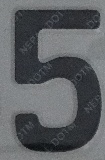

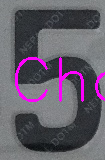

In [ ]:
import argparse
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import img_to_array
import cv2
from google.colab.patches import cv2_imshow

# Define constants
TARGET_WIDTH = 128
TARGET_HEIGHT = 128
MODEL_PATH = '/content/drive/MyDrive/OCR/platecharacters/trained_model'  # Update with the correct path in Colab

print("[INFO] Loading my model...")
model = load_model(MODEL_PATH, compile=False)


labels = [
    '0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F',
    'H'
]

# Capture image from user
print("Please upload an image:")
from google.colab import files
uploaded = files.upload()

# Load the uploaded image
image_path = list(uploaded.keys())[0]
original_image = cv2.imread(image_path)
image = cv2.resize(original_image, (TARGET_WIDTH, TARGET_HEIGHT))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

# Classify the input image then find the index of the class with the *largest* probability
print("[INFO] Classifying image...")
prob = model.predict(image)[0]
idx = np.argmax(prob)

# Display original image
cv2_imshow(original_image)

# Display the predicted image
cv2.putText(original_image, 'Character is ' + labels[idx],
    (10, 100),
    cv2.FONT_HERSHEY_SIMPLEX,
    2,
    (255,0,255),
    2)
cv2_imshow(original_image)

[INFO] Loading my model...
Please upload an image:


Saving 2_DSC02189.JPG to 2_DSC02189 (3).JPG
[INFO] Classifying image...
1/1 [==============================] - 0s 96ms/step


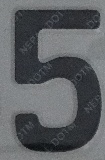

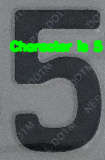

In [ ]:
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import img_to_array
import cv2
from google.colab.patches import cv2_imshow  # Required for displaying images in Colab

# Define constants
TARGET_WIDTH = 128
TARGET_HEIGHT = 128
MODEL_PATH = '/content/drive/MyDrive/OCR/platecharacters/trained_model'  # Update with the correct path in Colab

# Load the trained convolutional neural network
print("[INFO] Loading my model...")
model = load_model(MODEL_PATH, compile=False)

labels = [
    '0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F',
    'H'
]

# Capture image from user
print("Please upload an image:")
from google.colab import files
uploaded = files.upload()

# Load the uploaded image
image_path = list(uploaded.keys())[0]
original_image = cv2.imread(image_path)
image = cv2.resize(original_image, (TARGET_WIDTH, TARGET_HEIGHT))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

# Classify the input image then find the index of the class with the *largest* probability
print("[INFO] Classifying image...")
prob = model.predict(image)[0]
idx = np.argmax(prob)

# Display original image
cv2_imshow(original_image)

# Display the predicted image with visible prediction text
output_image = original_image.copy()
cv2.putText(output_image, 'Character is ' + labels[idx],
    (10, 50),  # Adjust text position as needed
    cv2.FONT_HERSHEY_SIMPLEX,
    0.4,  # Font scale
    (0, 255, 0),  # Text color (in BGR format, so this is green)
    2,  # Thickness of the text
    cv2.LINE_AA)  # Anti-aliasing for smoother text
cv2_imshow(output_image)


[INFO] Loading my model...
Please upload an image:


Saving a (4).jpg to a (4).jpg
[INFO] Classifying image...
1/1 [==============================] - 0s 105ms/step


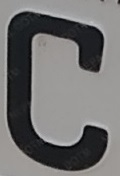

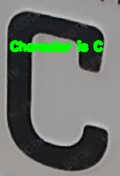

In [ ]:
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import img_to_array
import cv2
from google.colab.patches import cv2_imshow  # Required for displaying images in Colab

# Define constants
TARGET_WIDTH = 128
TARGET_HEIGHT = 128
MODEL_PATH = '/content/drive/MyDrive/OCR/platecharacters/trained_model'  # Update with the correct path in Colab

# Load the trained convolutional neural network
print("[INFO] Loading my model...")
model = load_model(MODEL_PATH, compile=False)

labels = [
    '0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F',
    'H'
]

# Capture image from user
print("Please upload an image:")
from google.colab import files
uploaded = files.upload()

# Load the uploaded image
image_path = list(uploaded.keys())[0]
original_image = cv2.imread(image_path)
image = cv2.resize(original_image, (TARGET_WIDTH, TARGET_HEIGHT))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

# Classify the input image then find the index of the class with the *largest* probability
print("[INFO] Classifying image...")
prob = model.predict(image)[0]
idx = np.argmax(prob)

# Display original image
cv2_imshow(original_image)

# Display the predicted image with visible prediction text
output_image = original_image.copy()
cv2.putText(output_image, 'Character is ' + labels[idx],
    (10, 50),  # Adjust text position as needed
    cv2.FONT_HERSHEY_SIMPLEX,
    0.4,  # Font scale
    (0, 255, 0),  # Text color (in BGR format, so this is green)
    2,  # Thickness of the text
    cv2.LINE_AA)  # Anti-aliasing for smoother text
cv2_imshow(output_image)

[INFO] Loading my model...
Please upload an image:


Saving 44673.png to 44673 (1).png
[INFO] Classifying image...
1/1 [==============================] - 0s 92ms/step


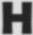

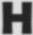

In [ ]:
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import img_to_array
import cv2
from google.colab.patches import cv2_imshow  # Required for displaying images in Colab

# Define constants
TARGET_WIDTH = 128
TARGET_HEIGHT = 128
MODEL_PATH = '/content/drive/MyDrive/OCR/platecharacters/trained_model'  # Update with the correct path in Colab

# Load the trained convolutional neural network
print("[INFO] Loading my model...")
model = load_model(MODEL_PATH, compile=False)

labels = [
    '0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F',
    'H'
]

# Capture image from user
print("Please upload an image:")
from google.colab import files
uploaded = files.upload()

# Load the uploaded image
image_path = list(uploaded.keys())[0]
original_image = cv2.imread(image_path)
# Resize the image to a larger size for better prediction accuracy
resized_image = cv2.resize(original_image, (128, 128))
image = resized_image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)


# Classify the input image then find the index of the class with the *largest* probability
print("[INFO] Classifying image...")
prob = model.predict(image)[0]
idx = np.argmax(prob)

# Display original image
cv2_imshow(original_image)

# Display the predicted image with visible prediction text
cv2.putText(output_image, 'Character is ' + labels[idx],
    (10, 50),  # Adjust text position as needed
    cv2.FONT_HERSHEY_SIMPLEX,
    0.4,  # Font scale
    (0, 255, 0),  # Text color (in BGR format, so this is green)
    2,  # Thickness of the text
    cv2.LINE_AA)  # Anti-aliasing for smoother text
cv2_imshow(output_image)

In [ ]:
import cv2
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from google.colab import files
from google.colab.patches import cv2_imshow  # Required for displaying images in Colab

# Upload the image file
uploaded_image = files.upload()
image_path = list(uploaded_image.keys())[0]

# Load the trained model
model_path = "/content/drive/MyDrive/OCR/platecharacters/trained_model"  # Update with the correct model path
model = load_model(model_path, compile=False)

# Read the uploaded image and convert to grayscale
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Preprocess the image
resized_image = cv2.resize(gray, (128, 128))  # Assuming your model expects 128x128 images
resized_image = resized_image.astype("float") / 255.0
resized_image = img_to_array(resized_image)
resized_image = np.expand_dims(resized_image, axis=0)

# Display the uploaded image
cv2_imshow(image)
cv2.waitKey(0)


# Apply Gaussian blurring and thresholding
# to reveal the characters on the license plate
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blurred, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 45, 15)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Perform connected components analysis on the thresholded image and
# initialize the mask to hold only the components we are interested in
_, labels = cv2.connectedComponents(thresh)
mask = np.zeros(thresh.shape, dtype="uint8")

In [ ]:
# Set lower bound and upper bound criteria for characters
total_pixels = image.shape[0] * image.shape[1]
lower = total_pixels // 70 # heuristic param, can be fine tuned if necessary
upper = total_pixels // 20 # heuristic param, can be fine tuned if necessary

In [ ]:
# Loop over the unique components
for (i, label) in enumerate(np.unique(labels)):
    # If this is the background label, ignore it
    if label == 0:
        continue

    # Otherwise, construct the label mask to display only connected component
    # for the current label
    labelMask = np.zeros(thresh.shape, dtype="uint8")
    labelMask[labels == label] = 255
    numPixels = cv2.countNonZero(labelMask)

    # If the number of pixels in the component is between lower bound and upper bound,
    # add it to our mask
    if numPixels > lower and numPixels < upper:
        mask = cv2.add(mask, labelMask)

In [ ]:
# Find contours and get bounding box for each contour
cnts, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
boundingBoxes = [cv2.boundingRect(c) for c in cnts]

In [ ]:
import functools
# Sort the bounding boxes from left to right, top to bottom
# sort by Y first, and then sort by X if Ys are similar
def compare(rect1, rect2):
    if abs(rect1[1] - rect2[1]) > 10:
        return rect1[1] - rect2[1]
    else:
        return rect1[0] - rect2[0]
boundingBoxes = sorted(boundingBoxes, key=functools.cmp_to_key(compare) )

In [ ]:
# Define constants
TARGET_WIDTH = 128
TARGET_HEIGHT = 128

chars = [
    '0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F',
    'H'
    ]

In [ ]:
# Load the trained model
model_path = "/content/drive/MyDrive/OCR/platecharacters/trained_model"  # Update with the correct model path
model = load_model(model_path, compile=False)

In [ ]:
import cv2
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from google.colab import files
from google.colab.patches import cv2_imshow  # Required for displaying images in Colab


# Load the pre-trained model
MODEL_PATH = "/content/drive/MyDrive/OCR/platecharacters/trained_model"  # Update with your model path
model = load_model(MODEL_PATH, compile=False)

# Read the uploaded image
image = cv2.imread(image_path)

# Define constants for padding and target image size
TARGET_WIDTH = 128
TARGET_HEIGHT = 128

# Perform OCR on the image
vehicle_plate = ""

# Assuming boundingBoxes is defined somewhere with the character bounding boxes
# Loop over the bounding boxes
for rect in boundingBoxes:
    x, y, w, h = rect

    # Crop the character from the image
    crop = image[y:y+h, x:x+w]
    crop = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    crop = cv2.bitwise_not(crop)  # Invert the colors

    # Apply padding to match the input size of the pre-trained model
    rows, columns = crop.shape
    paddingY = (TARGET_HEIGHT - rows) // 2 if rows < TARGET_HEIGHT else int(0.17 * rows)
    paddingX = (TARGET_WIDTH - columns) // 2 if columns < TARGET_WIDTH else int(0.45 * columns)
    crop = cv2.copyMakeBorder(crop, paddingY, paddingY, paddingX, paddingX, cv2.BORDER_CONSTANT, value=255)

    # Resize the image to match the input size of the pre-trained model
    crop = cv2.resize(crop, (TARGET_WIDTH, TARGET_HEIGHT))

    # Prepare the cropped image for prediction
    crop = crop.astype("float") / 255.0
    crop = img_to_array(crop)
    crop = np.expand_dims(crop, axis=0)

    # Make prediction using the pre-trained model
    prob = model.predict(crop)[0]
    idx = np.argmax(prob)
    vehicle_plate += chars[idx]

    # Show bounding box and prediction on the image
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(image, chars[idx], (x, y+15), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

# Display the final image with predictions
cv2_imshow(image)
print("Vehicle plate:", vehicle_plate)


Output hidden; open in https://colab.research.google.com to view.

Saving BAA6542.jpg to BAA6542.jpg


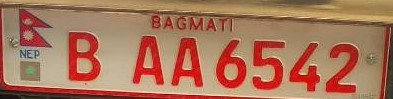

1/1 [==============================] - 0s 19ms/step


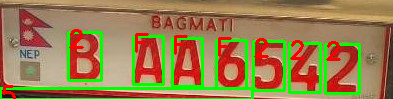

Vehicle plate: 2FFF2225


-1

In [ ]:
import cv2
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from google.colab import files
from google.colab.patches import cv2_imshow  # Required for displaying images in Colab

# Upload the image file
uploaded = files.upload()
image_path = next(iter(uploaded))

# Load the pre-trained model
MODEL_PATH = "/content/drive/MyDrive/OCR/platecharacters/trained_model"  # Update with your model path
model = load_model(MODEL_PATH, compile=False)

# Read the uploaded image and convert to grayscale
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Show the original image
cv2_imshow(image)

# Apply Gaussian blurring and thresholding
# to reveal the characters on the license plate
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blurred, 255,
	cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 45, 15)

# Perform connected components analysis on the thresholded images and
# initialize the mask to hold only the components we are interested in
_, labels = cv2.connectedComponents(thresh)
mask = np.zeros(thresh.shape, dtype="uint8")

# Set lower bound and upper bound criteria for characters
total_pixels = image.shape[0] * image.shape[1]
lower = total_pixels // 70  # heuristic param, can be fine-tuned if necessary
upper = total_pixels // 20  # heuristic param, can be fine-tuned if necessary

# Loop over the unique components
for (i, label) in enumerate(np.unique(labels)):
	# If this is the background label, ignore it
	if label == 0:
		continue

	# Otherwise, construct the label mask to display only connected component
	# for the current label
	labelMask = np.zeros(thresh.shape, dtype="uint8")
	labelMask[labels == label] = 255
	numPixels = cv2.countNonZero(labelMask)

	# If the number of pixels in the component is between lower bound and upper bound,
	# add it to our mask
	if numPixels > lower and numPixels < upper:
		mask = cv2.add(mask, labelMask)

# Find contours and get bounding box for each contour
cnts, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
boundingBoxes = [cv2.boundingRect(c) for c in cnts]

# Sort the bounding boxes from left to right, top to bottom
# sort by Y first, and then sort by X if Ys are similar
def compare(rect1, rect2):
    if abs(rect1[1] - rect2[1]) > 10:
        return rect1[1] - rect2[1]
    else:
        return rect1[0] - rect2[0]
boundingBoxes = sorted(boundingBoxes, key=functools.cmp_to_key(compare) )

# Define constants
TARGET_WIDTH = 128
TARGET_HEIGHT = 128

chars = [
    '0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F',
    'H'
    ]

vehicle_plate = ""
# Loop over the bounding boxes
for rect in boundingBoxes:

    # Get the coordinates from the bounding box
    x,y,w,h = rect

    # Crop the character from the mask
    # and apply bitwise_not because in our training data for pre-trained model
    # the characters are black on a white background
    crop = mask[y:y+h, x:x+w]
    crop = cv2.bitwise_not(crop)

    # Get the number of rows and columns for each cropped image
    # and calculate the padding to match the image input of pre-trained model
    rows = crop.shape[0]
    columns = crop.shape[1]
    paddingY = (TARGET_HEIGHT - rows) // 2 if rows < TARGET_HEIGHT else int(0.17 * rows)
    paddingX = (TARGET_WIDTH - columns) // 2 if columns < TARGET_WIDTH else int(0.45 * columns)

    # Apply padding to make the image fit for neural network model
    crop = cv2.copyMakeBorder(crop, paddingY, paddingY, paddingX, paddingX, cv2.BORDER_CONSTANT, None, 255)

    # Convert and resize image
    crop = cv2.cvtColor(crop, cv2.COLOR_GRAY2RGB)
    crop = cv2.resize(crop, (TARGET_WIDTH, TARGET_HEIGHT))

    # Prepare data for prediction
    crop = crop.astype("float") / 255.0
    crop = img_to_array(crop)
    crop = np.expand_dims(crop, axis=0)

    # Make prediction
    prob = model.predict(crop)[0]
    idx = np.argsort(prob)[-1]
    vehicle_plate += chars[idx]

    # Show bounding box and prediction on image
    cv2.rectangle(image, (x,y), (x+w,y+h), (0, 255, 0), 2)
    cv2.putText(image, chars[idx], (x,y+15), 0, 0.8, (0, 0, 255), 2)

# Show final image
cv2_imshow(image)
print("Vehicle plate: " + vehicle_plate)
cv2.waitKey(0)
